In [1]:
import pandas as pd
import QuantLib as ql
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
quotes = {'FEDL01' : 0.0066,'USSO1Z' : 0.006445,
          'USSO2Z' : 0.006455,'USSO3Z' : 0.00645,'USSOA' : 0.00675,
          'USSOB' : 0.007,'USSOC' : 0.00724,'USSOD' : 0.007533,
          'USSOE' : 0.00785,'USSOF' : 0.00814,'USSOI' : 0.00889,
          'USSO1' : 0.00967,'USSO2' : 0.01221,'USSO3' : 0.01413,
          'USSO4' : 0.01555,'USSO5' : 0.01672,'USSO10' : 0.02005,
          'USSO12' : 0.0208,'USSO15' : 0.02152,'USSO20' : 0.02215,
          'USSO25' : 0.02233,'USSO30' : 0.02234,'USSO40' : 0.02233}

In [3]:
ql_date = ql.Date(21, 2, 2017)
evaluation_date = ql_date
ql.Settings.instance().evaluationDate = evaluation_date
calendar = ql.UnitedStates()

In [4]:
ff = ql.FedFunds()
ois_settlement_days = 2 #
ois_float_index = ff 
ois_paymentLag = 2

In [5]:
ff_rate_helpers2 = [ql.DepositRateHelper(
                    ql.QuoteHandle(ql.SimpleQuote(quotes['FEDL01'])),
                    ql.Period(1, ql.Days), 
                    ff.fixingDays(), 
                    ff.fixingCalendar(),
                    ff.businessDayConvention(),
                    ff.endOfMonth() , 
                    ff.dayCounter() ) ]

ff_rate_helpers2 += [ql.OISRateHelper(
                    ois_settlement_days,
                    tenor,
                    ql.QuoteHandle(ql.SimpleQuote(rate)),
                    ois_float_index,
                    ql.YieldTermStructureHandle(),
                    False,
                    ois_paymentLag) 
                  for rate, tenor in [
                        (quotes['USSO1Z'], ql.Period(1, ql.Weeks)),
                        (quotes['USSO2Z'], ql.Period(2, ql.Weeks)),
                        (quotes['USSO3Z'], ql.Period(3, ql.Weeks)),
                        (quotes['USSOA'], ql.Period(1, ql.Months)),
                        (quotes['USSOB'], ql.Period(2, ql.Months)),
                        (quotes['USSOC'], ql.Period(3, ql.Months)),
                        (quotes['USSOD'], ql.Period(4, ql.Months)),
                        (quotes['USSOE'], ql.Period(5, ql.Months)),
                        (quotes['USSOF'], ql.Period(6, ql.Months)),
                        (quotes['USSOI'], ql.Period(9, ql.Months)),
                        (quotes['USSO1'], ql.Period(1, ql.Years)),
                        (quotes['USSO2'], ql.Period(2, ql.Years)),
                        (quotes['USSO3'], ql.Period(3, ql.Years)),
                        (quotes['USSO4'], ql.Period(4, ql.Years)),
                        (quotes['USSO5'], ql.Period(5, ql.Years)),
                        (quotes['USSO10'], ql.Period(10, ql.Years)),
                        (quotes['USSO12'], ql.Period(12, ql.Years)),
                        (quotes['USSO15'], ql.Period(15, ql.Years)),
                        (quotes['USSO20'], ql.Period(20, ql.Years)),
                        (quotes['USSO25'], ql.Period(25, ql.Years)),
                        (quotes['USSO30'], ql.Period(30, ql.Years)),
                        (quotes['USSO40'], ql.Period(40, ql.Years)) ] ]


In [6]:
ois_curve2 = ql.PiecewiseLogCubicDiscount(
                0, ql.UnitedStates(), ff_rate_helpers2, ql.Actual365Fixed())
ois_curve2.enableExtrapolation()

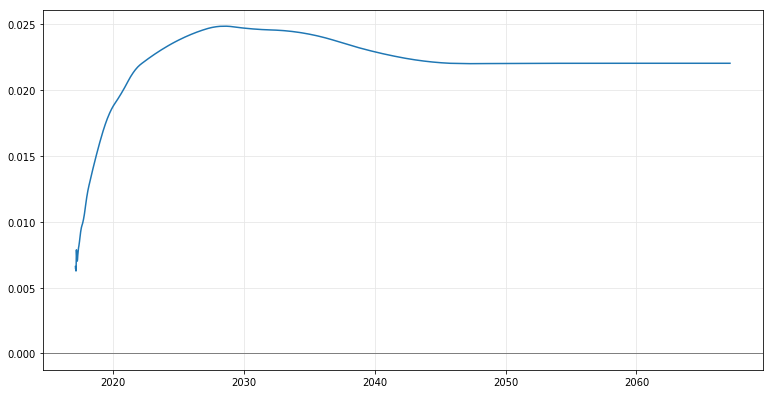

In [7]:
start_ql_date = ql_date
end_ql_date = start_ql_date + ql.Period(50, ql.Years)

swap_curve = ois_curve2
default_plot_size = (10,5)

dates = [start_ql_date + ql.Period(i,ql.Days) for i in range(0, end_ql_date-start_ql_date+1)]
dates_ = [ dt.date(d.year(), d.month(), d.dayOfMonth()) for d in dates ]

f = plt.figure(figsize = default_plot_size)
ax = f.add_axes([0,0,1,1])
ax.xaxis.grid(True, 'major', color=(0.9, 0.9, 0.9))
ax.yaxis.grid(True, 'major', color=(0.9, 0.9, 0.9))

y = [swap_curve.forwardRate(
        d, calendar.advance(d, 1, ql.Days), ql.Actual360(), ql.Continuous).rate() 
         for d in dates]
ax.plot_date(dates_, y, '-')

ax.axhline(0.0, linewidth=1, color=(0.5,0.5,0.5))

plt.show()


### The last cell runs fine under QuantLib-Python Release 1.15, but returns the following error under 1.16.
```
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-7-4f69c417b14a> in <module>
     15 y = [swap_curve.forwardRate(
     16         d, calendar.advance(d, 1, ql.Days), ql.Actual360(), ql.Continuous).rate() 
---> 17          for d in dates]
     18 ax.plot_date(dates_, y, '-')
     19 

<ipython-input-7-4f69c417b14a> in <listcomp>(.0)
     15 y = [swap_curve.forwardRate(
     16         d, calendar.advance(d, 1, ql.Days), ql.Actual360(), ql.Continuous).rate() 
---> 17          for d in dates]
     18 ax.plot_date(dates_, y, '-')
     19 

~/anaconda3/envs/finml/lib/python3.6/site-packages/QuantLib/QuantLib.py in forwardRate(self, *args)
   4956 
   4957     def forwardRate(self, *args):
-> 4958         return _QuantLib.YieldTermStructure_forwardRate(self, *args)
   4959     __swig_destroy__ = _QuantLib.delete_YieldTermStructure
   4960 

RuntimeError: convergence not reached after 99 iterations; last improvement 0.00106898, required accuracy 1e-12
```


RuntimeError: convergence not reached after 99 iterations; last improvement 0.00106898, required accuracy 1e-12

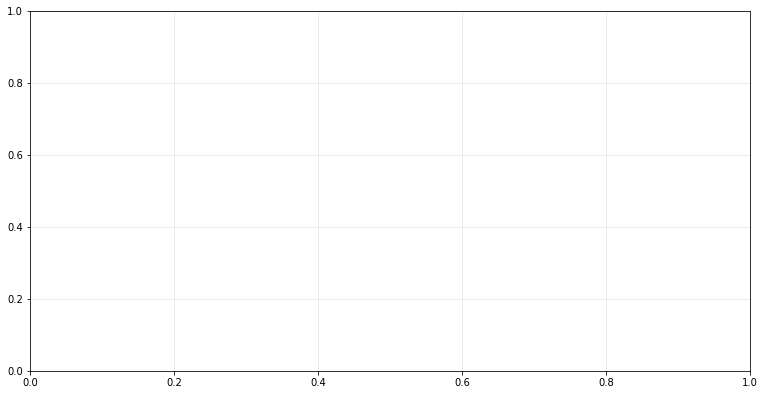

In [7]:
start_ql_date = ql_date
end_ql_date = start_ql_date + ql.Period(50, ql.Years)

swap_curve = ois_curve2
default_plot_size = (10,5)

dates = [start_ql_date + ql.Period(i,ql.Days) for i in range(0, end_ql_date-start_ql_date+1)]
dates_ = [ dt.date(d.year(), d.month(), d.dayOfMonth()) for d in dates ]

f = plt.figure(figsize = default_plot_size)
ax = f.add_axes([0,0,1,1])
ax.xaxis.grid(True, 'major', color=(0.9, 0.9, 0.9))
ax.yaxis.grid(True, 'major', color=(0.9, 0.9, 0.9))

y = [swap_curve.forwardRate(
        d, calendar.advance(d, 1, ql.Days), ql.Actual360(), ql.Continuous).rate() 
         for d in dates]
ax.plot_date(dates_, y, '-')

ax.axhline(0.0, linewidth=1, color=(0.5,0.5,0.5))

plt.show()